# Part I


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## Phase 1:
### Exploratory Data Analysis:

In [2]:
df = pd.read_csv('data/Spaceship data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Spaceship data.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Checking Missing Values

In [ ]:
table = PrettyTable()

table.field_names = ['Column Name', 'Data Type', 'Non-Null Count']
for column in df.columns:
    data_type = str(df[column].dtype)
    non_null_count = df[column].count()
    table.add_row([column, data_type, non_null_count])
print(table)


+--------------+-----------+----------------+
| Column Name  | Data Type | Non-Null Count |
+--------------+-----------+----------------+
| PassengerId  |   object  |      8693      |
|  HomePlanet  |   object  |      8492      |
|  CryoSleep   |   object  |      8476      |
|    Cabin     |   object  |      8494      |
| Destination  |   object  |      8511      |
|     Age      |  float64  |      8514      |
|     VIP      |   object  |      8490      |
| RoomService  |  float64  |      8512      |
|  FoodCourt   |  float64  |      8510      |
| ShoppingMall |  float64  |      8485      |
|     Spa      |  float64  |      8510      |
|    VRDeck    |  float64  |      8505      |
|     Name     |   object  |      8493      |
| Transported  |    bool   |      8693      |
+--------------+-----------+----------------+


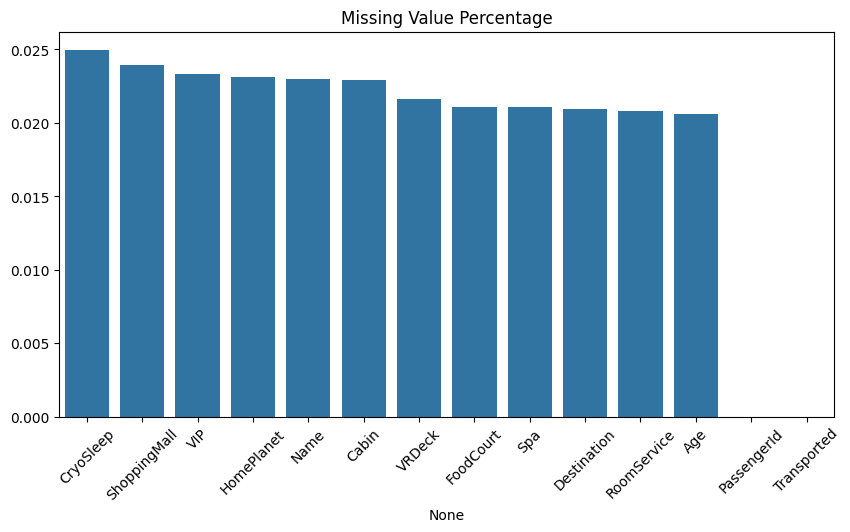

In [ ]:
# Checking which of columns have missing value and its percentage
missing = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45)
plt.title("Missing Value Percentage")
plt.show()

## EDA

### Target Analysis:

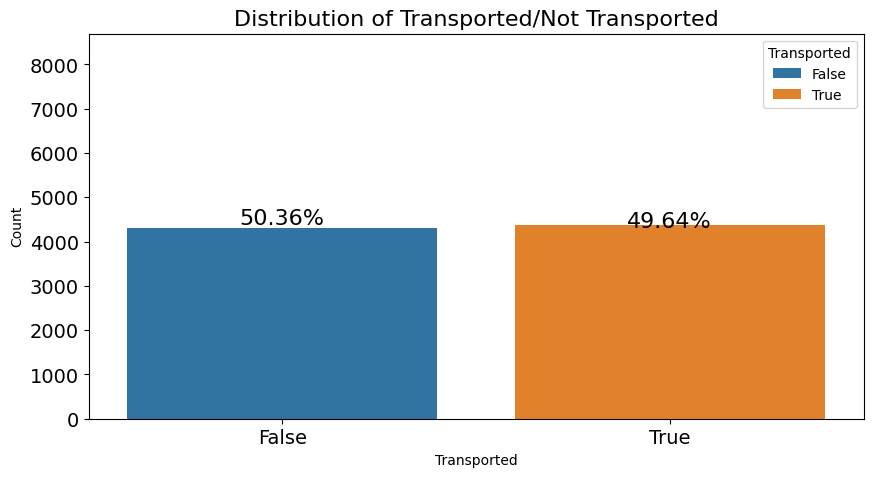

In [ ]:
# Counts and proportions
counts = df['Transported'].value_counts()
proportions = df['Transported'].value_counts(normalize=True)

proportions_str = [f'{p:.2%}' for p in proportions]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Transported', data=df, hue='Transported')
plt.title('Distribution of Transported/Not Transported', fontsize=16)
plt.xlabel('Transported')
plt.ylabel('Count')

plt.ylim(0, len(df))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Annotate percentages
for i, count in enumerate(counts):
    plt.text(i, count, proportions_str[i], ha='center', fontsize=16)

plt.show()


The **`Transported`** column is what we want to predict. As we can see there are about the same number of people who Transporned/Non-Transported.

***
### Feature Analysis:

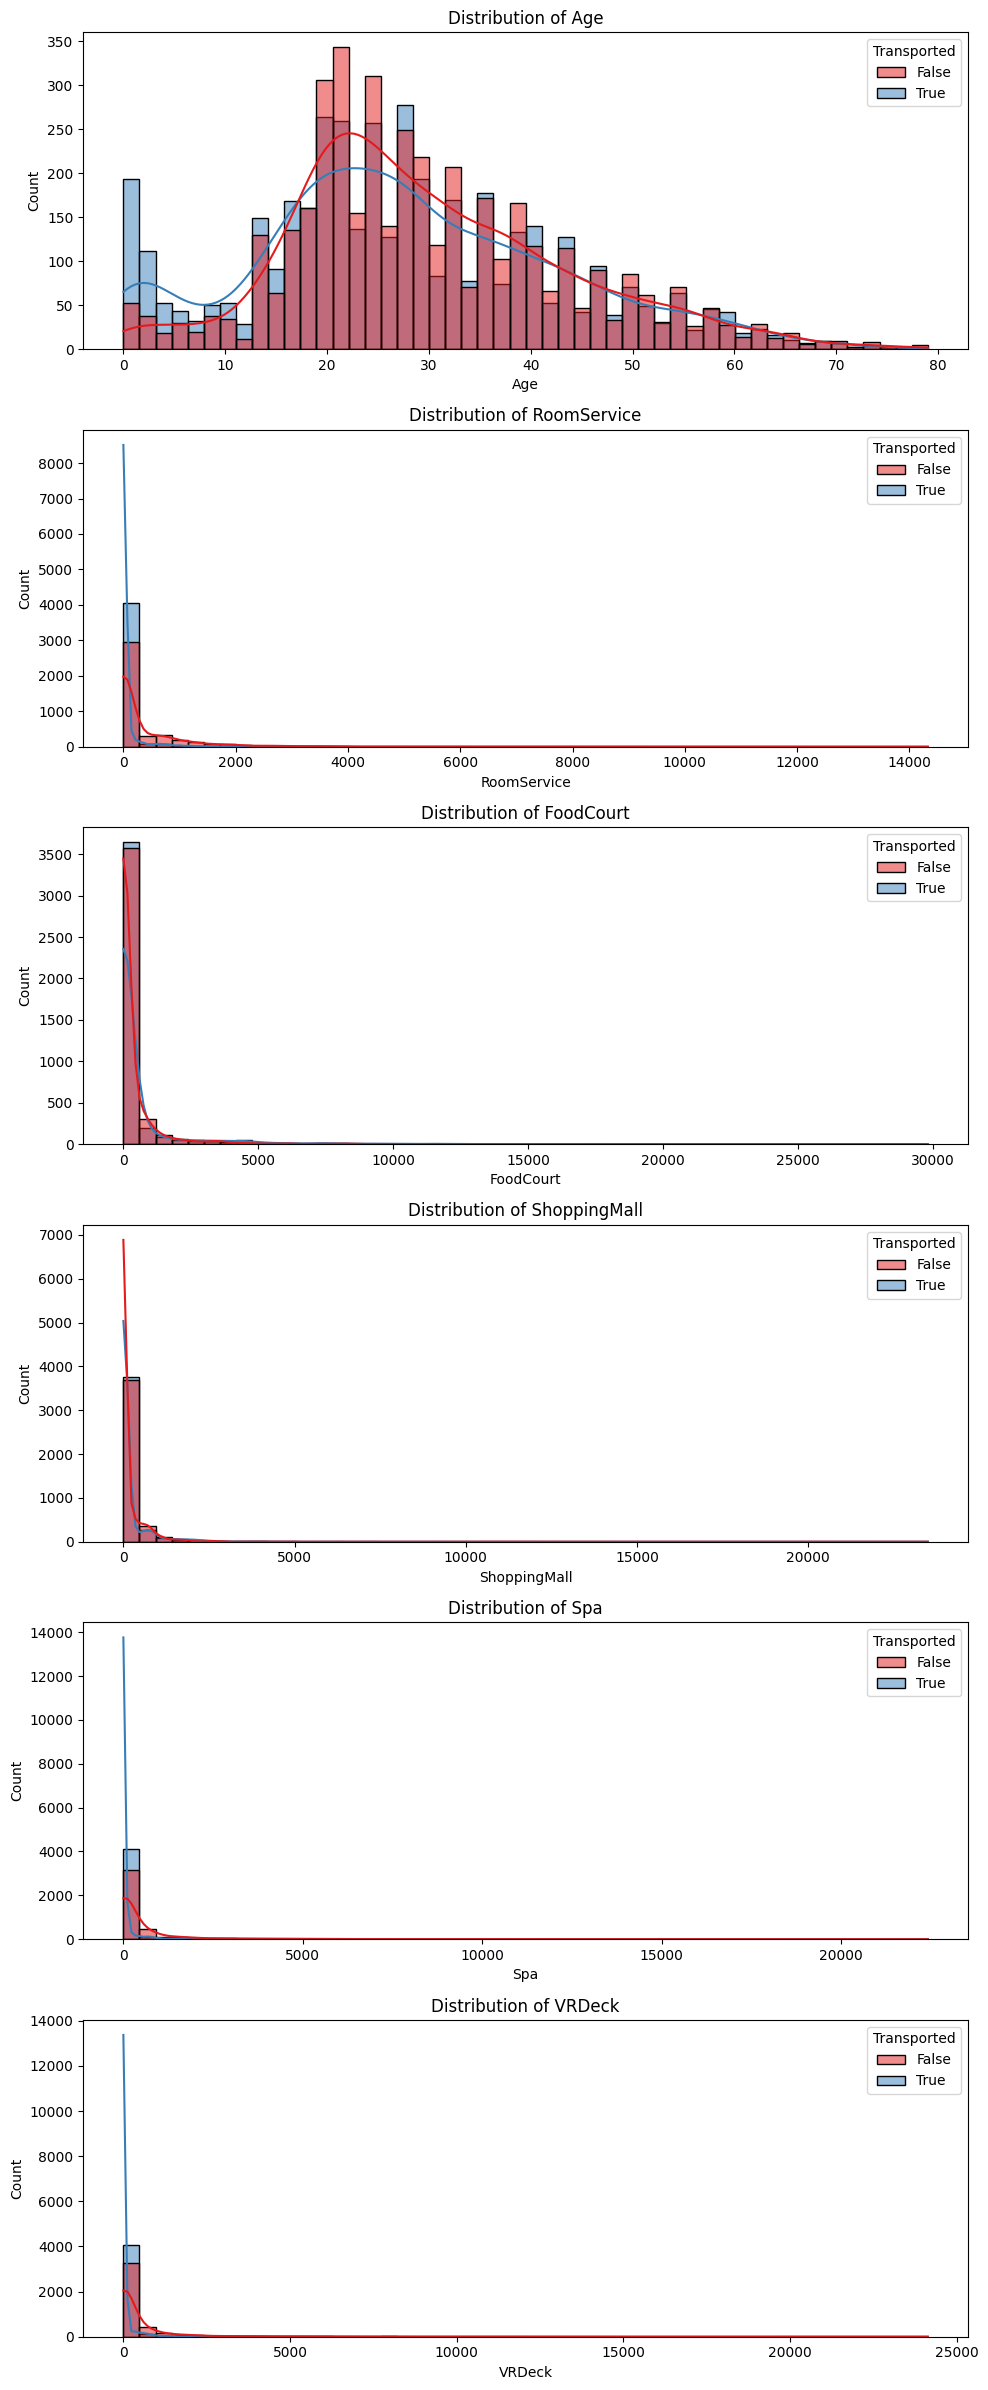

In [ ]:
continuous_cols = [
    c for c in df.columns
        if df[c].dtype in [float, int] and df[c].nunique() > 3
]

# Plot histograms for continuous variables
fig, axs = plt.subplots(len(continuous_cols), 1, figsize=(10, 4 * len(continuous_cols)))
for i, col in enumerate(continuous_cols):
    sns.histplot(
        data=df,
        x=col,
        hue="Transported",
        bins=50,
        kde=True,
        ax=axs[i],
        palette="Set1"
    )
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

The age distribution has a slight right skew, indicating a mostly young adult population. In contrast, all spending-related features exhibit highly skewed, zero-inflated distributions, with the majority of passengers recording no spending and a small number of extreme outliers.

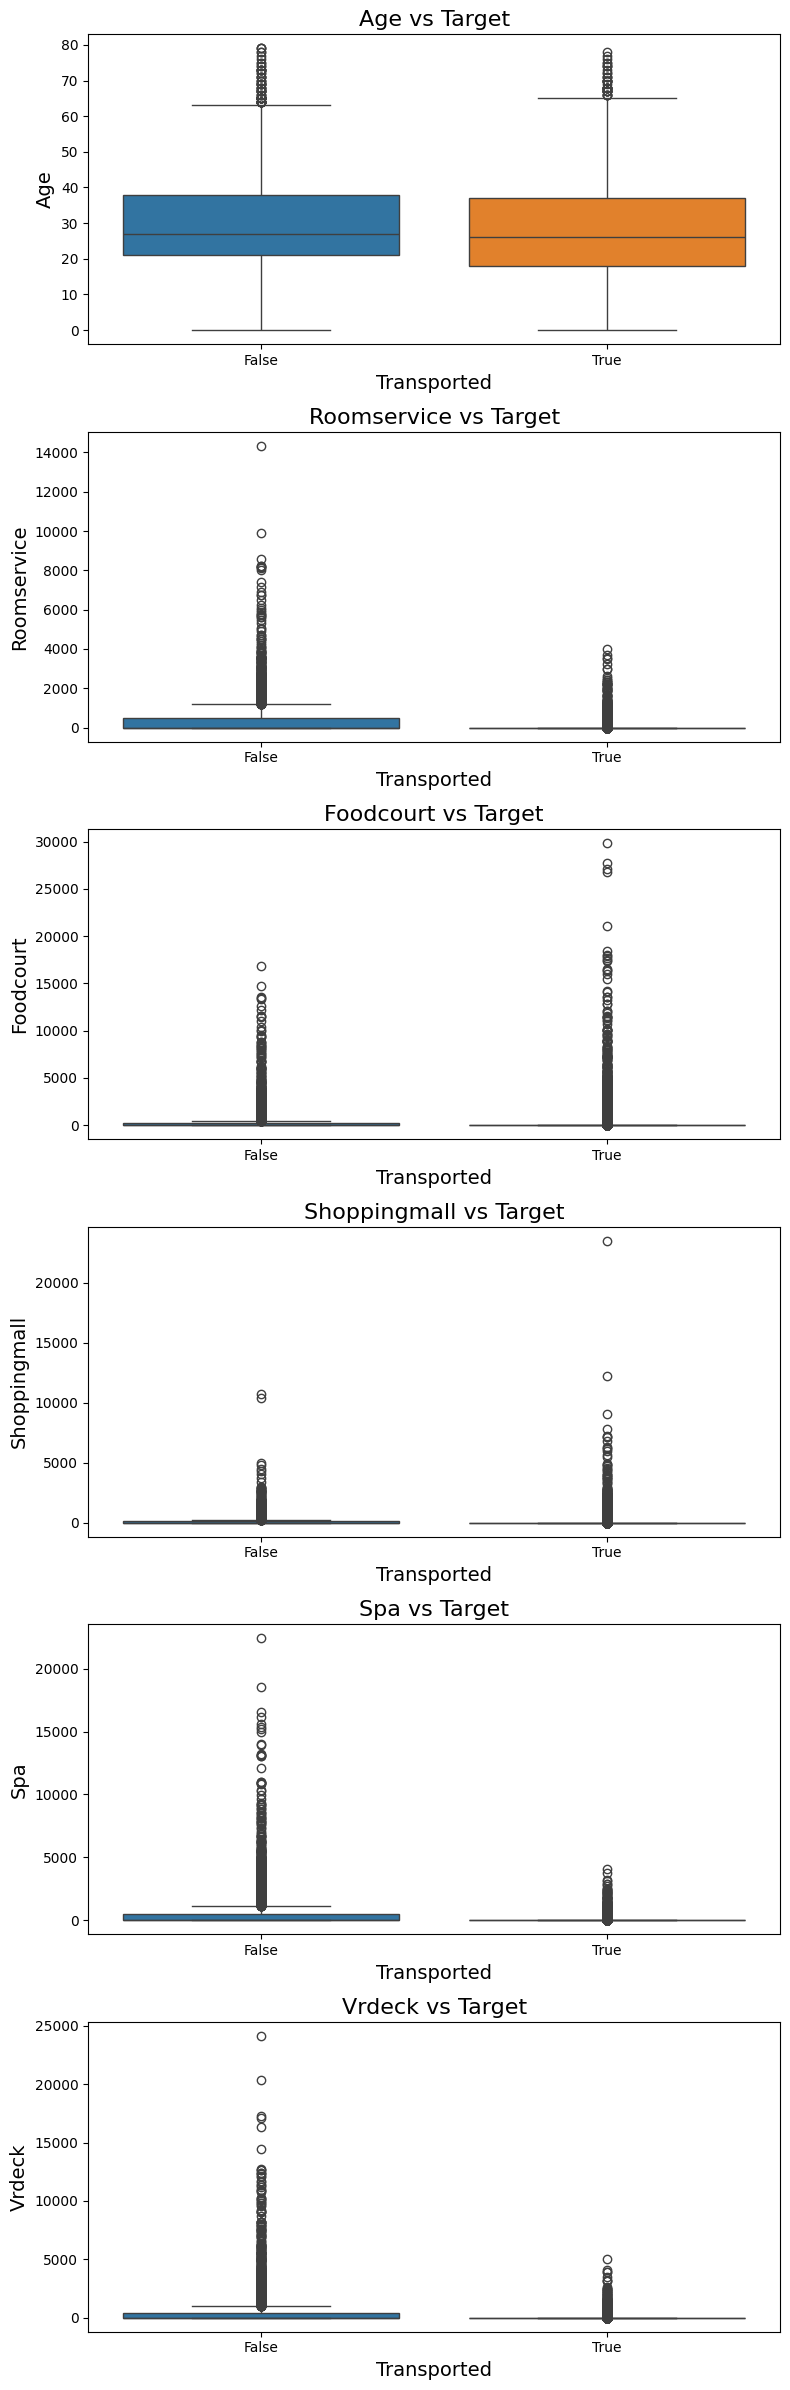

In [ ]:
# Create boxplots for each continuous feature
fig, axs = plt.subplots(len(continuous_cols), figsize=(8, 4 * len(continuous_cols)))
for i, col in enumerate(continuous_cols):
    sns.boxplot(
    data=df,
    x='Transported',
    y=col,
    hue='Transported',
    legend=False,
    ax=axs[i]
    )
    axs[i].set_title(f'{col.title()} vs Target', fontsize=16)
    axs[i].set_xlabel('Transported', fontsize=14)
    axs[i].set_ylabel(col.title(), fontsize=14)

fig.tight_layout()
plt.show()

From the boxplots above we can see that passengers who spent on **`RoomService`**, **`Spa`** and **`VRdeck`** have less tendency to be transported. **`Age`**, **`FoodCourt`** and **`ShoppingMall`** didn't show any tendencies to either being transported or not.

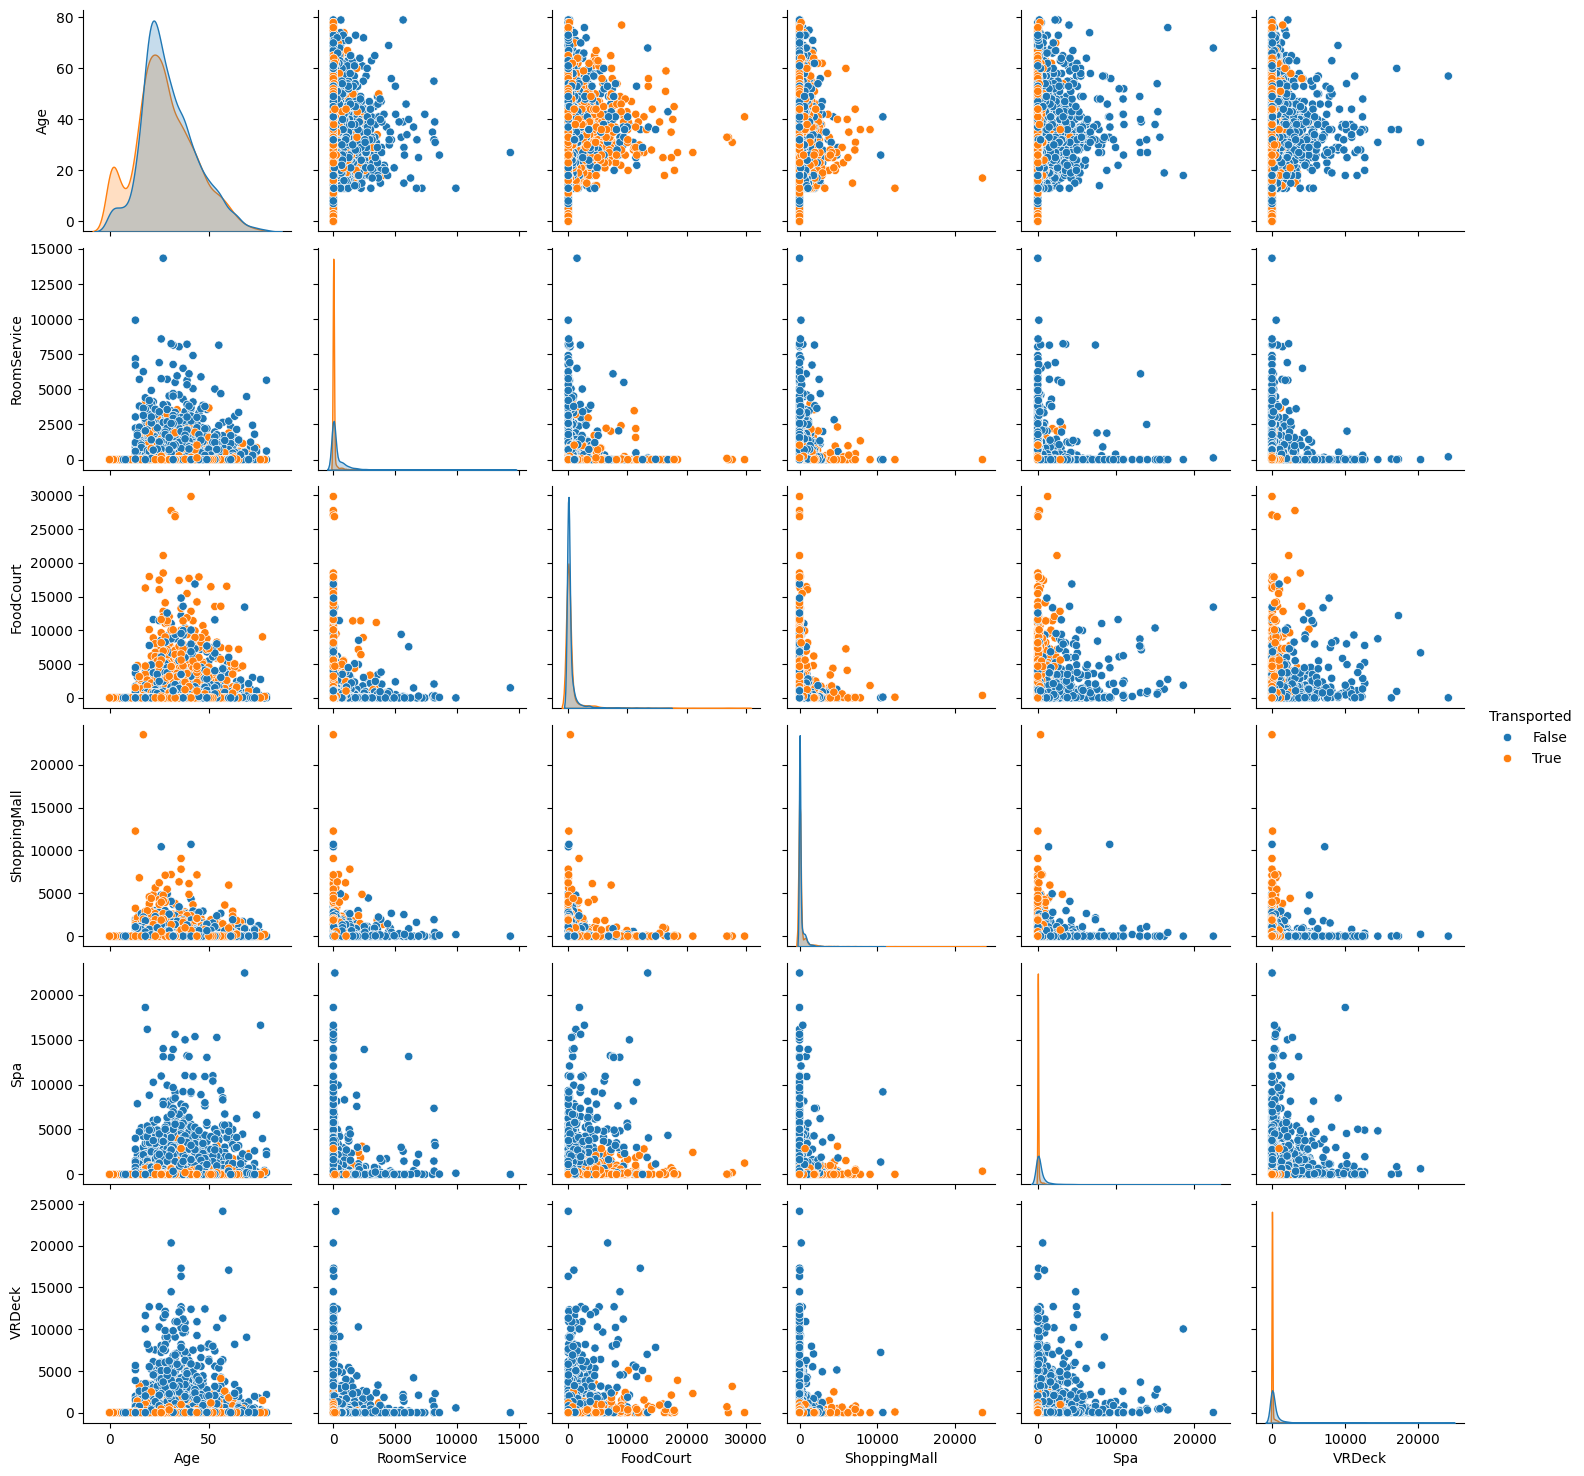

In [ ]:
sns.pairplot(data=df, vars=continuous_cols, hue='Transported')
plt.show()

The pairplot reveals strong separation between classes for Spa, VRDeck, and RoomService. Higher spending in these services is associated with a lower probability of being transported. Therefore, these features are aggregated into a single total spending variable to capture their combined predictive power.
***

In [ ]:
# Extract PassengerGroup from PassengerId
df['PassengerGroup'] = df['PassengerId'].str.split('_').str[0]

# Compute room / group size
group_sizes = df['PassengerGroup'].value_counts()
df['RoomSize'] = df['PassengerGroup'].map(group_sizes)

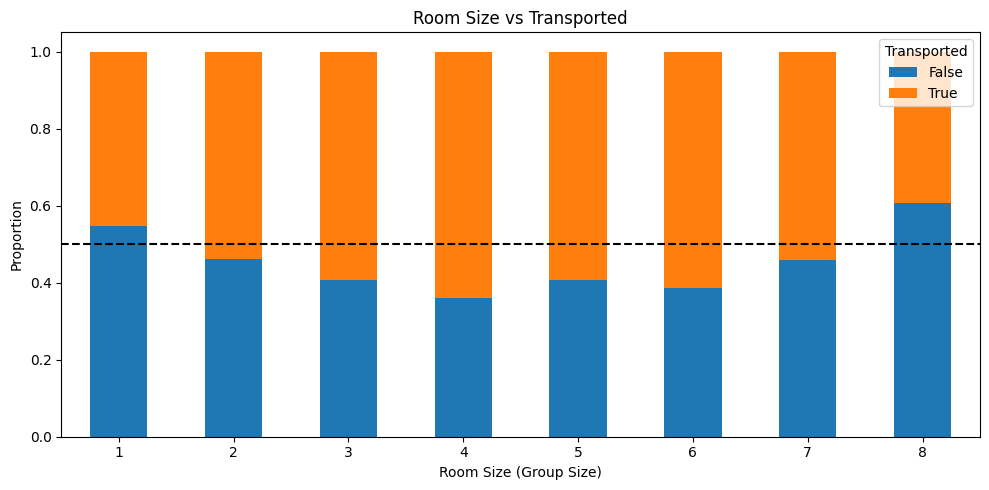

In [ ]:
ct = pd.crosstab(
    df['RoomSize'],
    df['Transported'],
    normalize='index'
)

ct.plot(kind='bar', stacked=True, figsize=(10,5))
plt.axhline(0.5, color='black', linestyle='--')
plt.xlabel('Room Size (Group Size)')
plt.ylabel('Proportion')
plt.title('Room Size vs Transported')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Room size shows a relationship with the target variable. Small and medium group sizes are associated with a higher likelihood of being transported, while solo travelers and very large groups show lower transported rates.

### Categorical Analysis:

In [ ]:
cat_features=[f for f in df.columns 
              if f not in continuous_cols + ["PassengerId","Name","Transported","RoomSize"]
              and df[f].nunique()<50]

cat_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

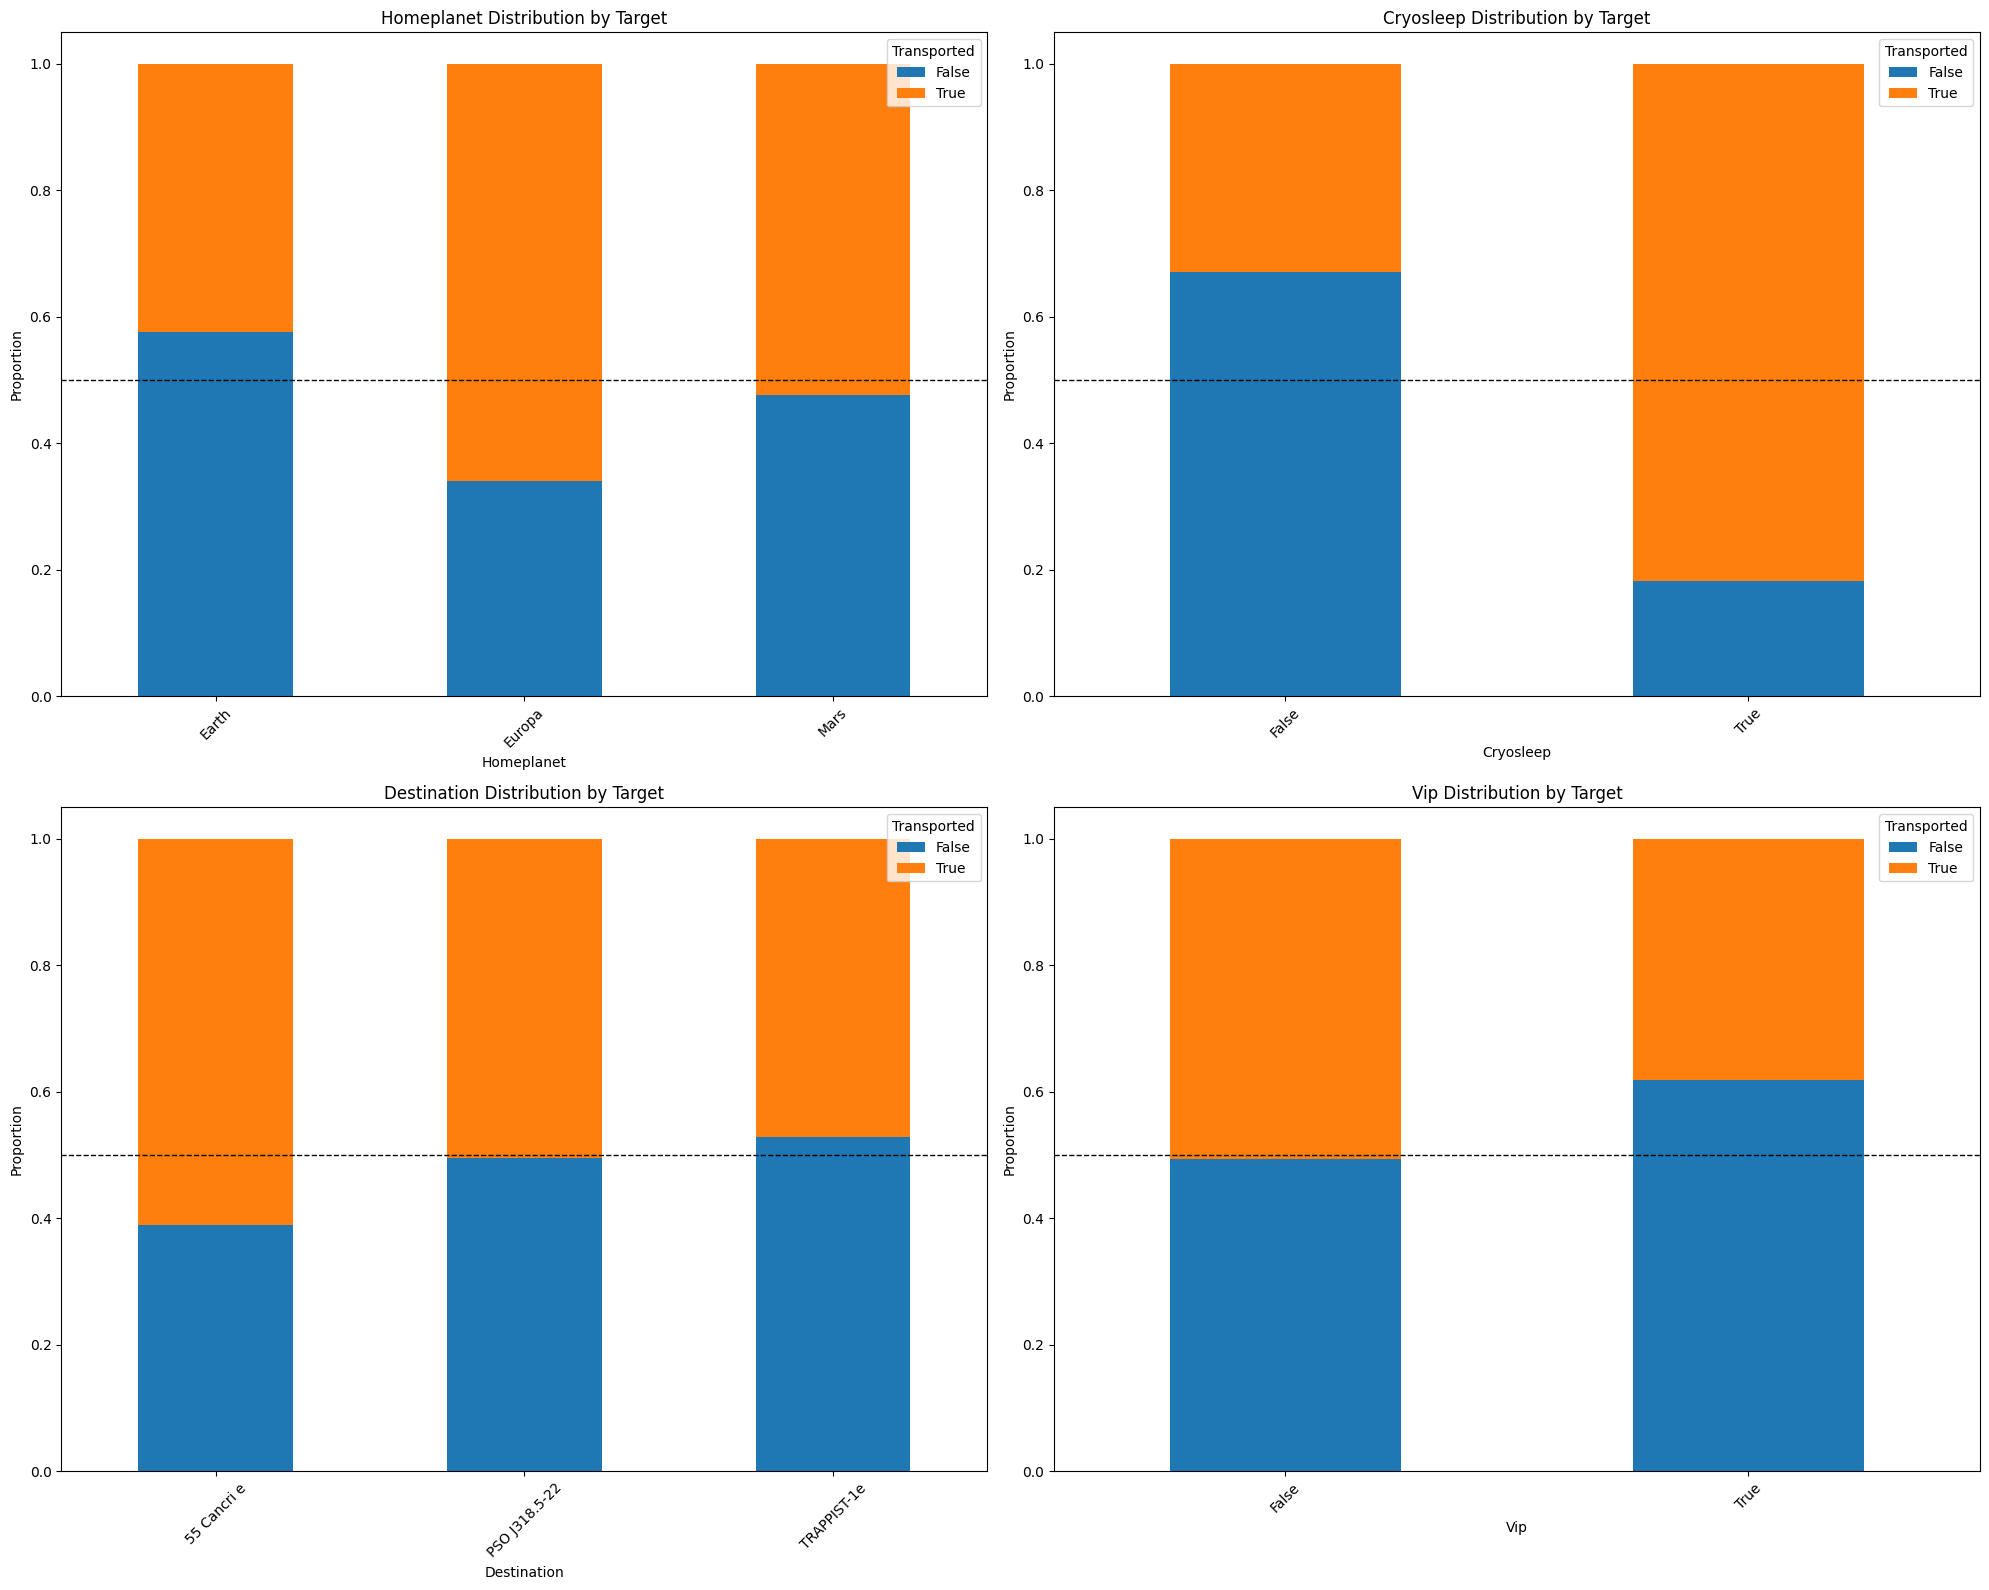

In [ ]:
target = 'Transported'

# Create subplots for each categorical feature
fig, axs = plt.subplots(2,2, figsize=(20, 16))

# Loop through each categorical feature and plot the contingency table in a subplot
for i, col in enumerate(cat_features):
    contingency_table = pd.crosstab(df[col], df[target], normalize='index')
    contingency_table.plot(kind='bar', stacked=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f"{col.title()} Distribution by Target")
    axs[i//2, i%2].set_xlabel(col.title())
    axs[i//2, i%2].set_ylabel("Proportion")
    
    axs[i//2, i%2].axhline(0.5, color='black', linestyle='--', linewidth=1)
    axs[i//2, i%2].tick_params(axis='x', rotation=45)
    
fig.tight_layout()
plt.show()


The analysis indicates that CryoSleep is strongly associated with the target variable, while HomePlanet and Destination show moderate effects. VIP demonstrates a weaker relationship, suggesting varying predictive strength among categorical features.

All of the Categorical features show difference in distributions.

CryoSleep have strong differnce, passengers in cryosleep are more likely to be transported.

***

## Phase 2:
### Data Cleaning:

In [ ]:
spending_cols = [
    'RoomService',
    'FoodCourt',
    'ShoppingMall',
    'Spa',
    'VRDeck'
]

***AI [1]***


1st of all, Passengers on **`CryoSleep=True`** should not spend money, so we changed their spending columns to 0.

In [ ]:
# Rows where CryoSleep=True and any spending is non-zero or NaN --> set spending to 0
# Set spending to 0 for these rows
df.loc[df['CryoSleep'] == True, spending_cols] = 0


2nd, if spending columns are not zero so CryoSleep most be False.

In [ ]:
# Rows where CryoSleep=NaN if there is any spending non-zero --> CryoSleep=False
# Set CryoSleep to False for these rows
df.loc[df['CryoSleep'].isna() & (df[spending_cols].fillna(0).sum(axis=1) != 0), 'CryoSleep'] = False

3rd, VIPs probably wont choose to be in CryoSleep.

In [ ]:
# Rows where CryoSleep=NaN and VIP=True --> CryoSleep=False
# Set CryoSleep to False for these rows
df.loc[(df['CryoSleep'].isna()) & (df['VIP']==True), 'CryoSleep'] = False

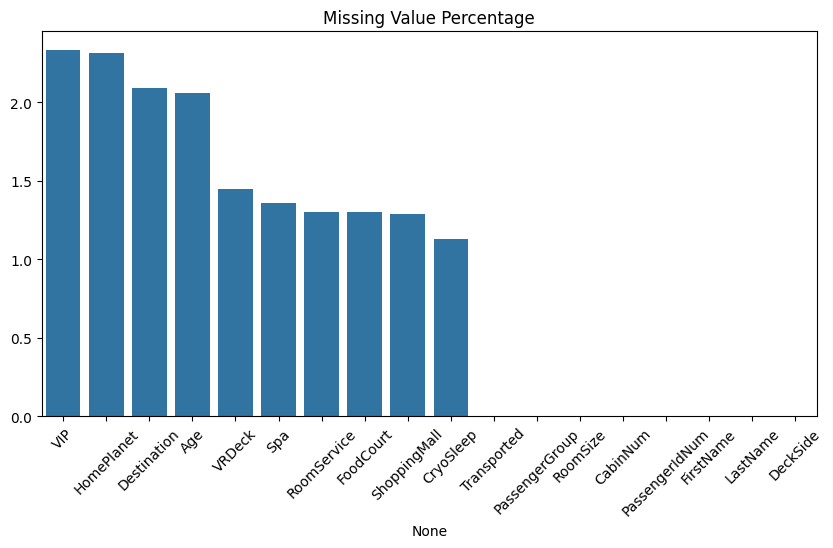

In [ ]:
# Checking which of columns have missing value and its percentage
missing = df.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values*100)
plt.xticks(rotation=45)
plt.title("Missing Value Percentage")
plt.show()

In [ ]:
for d in [df]:
    d[['Deck','CabinNum','Side']] = d['Cabin'].str.split('/', expand=True) # split Cabin to- Deck, CabinNum and Side
    d[['PassengerGroup','PassengerIdNum']] = d['PassengerId'].str.split('_', expand=True) # split PassengerId to- PassengerGroup and PassengerIdNum
    d[['FirstName','LastName']] = d['Name'].str.split(' ', expand=True) # split Name to- FirstName and LastName

# Fill missing values with 'Missing' label
# Cabin has NaN so fillna    
df.fillna({'Deck': 'MissingDeck'}, inplace=True)
df.fillna({'CabinNum': 'MissingCabinNum'}, inplace=True)
df.fillna({'Side': 'MissingSide'}, inplace=True)
# Name has NaN so fillna
df.fillna({'FirstName': 'MissingFirstName'}, inplace=True)
df.fillna({'LastName': 'MissingLastName'}, inplace=True)

df.drop(columns=['Cabin', 'PassengerId', 'Name'], inplace=True)

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,RoomSize,Deck,CabinNum,Side,PassengerIdNum,FirstName,LastName
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1,B,0,P,01,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,F,0,S,01,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,A,0,S,01,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,A,0,S,02,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,F,1,S,01,Willy,Santantines


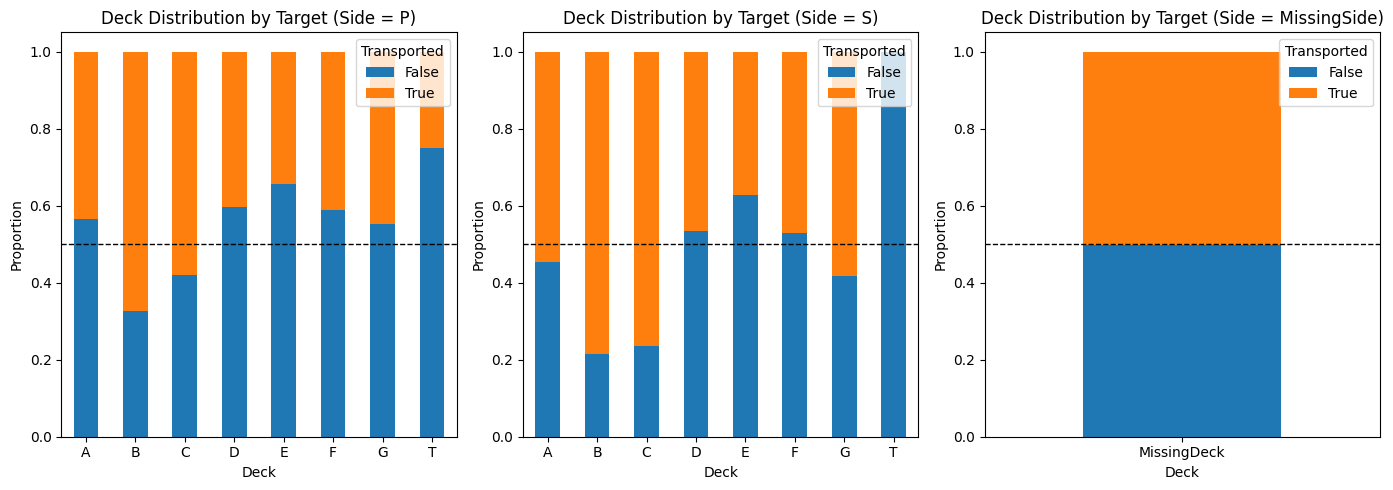

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

for ax, side in zip(axes, ["P", "S", "MissingSide"]):
    df_side = df[df["Side"] == side]
    # Create contingency table of Deck vs Target
    ct = pd.crosstab(
        df_side["Deck"],
        df_side[target],
        normalize="index"
    )

    ct.plot(
        kind="bar",
        stacked=True,
        ax=ax
    )

    ax.set_title(f"Deck Distribution by Target (Side = {side})")
    ax.set_xlabel("Deck")
    ax.set_ylabel("Proportion")
    ax.axhline(0.5, color="black", linestyle="--", linewidth=1)
    ax.tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

From the plots above we can infer couple of things:
1) Cabins 'G' and 'A' have different majority based on the side of the deck; alluding to mix those features.
2) Other Cabins has likely the same majority on each side of the deck; we may want examine mix it.
3) Missing Cabin information rows has equally split; we have no major decision for those with Missing Cabin.

so next, we'll examine the shown of the mixing Deck+Side effect.

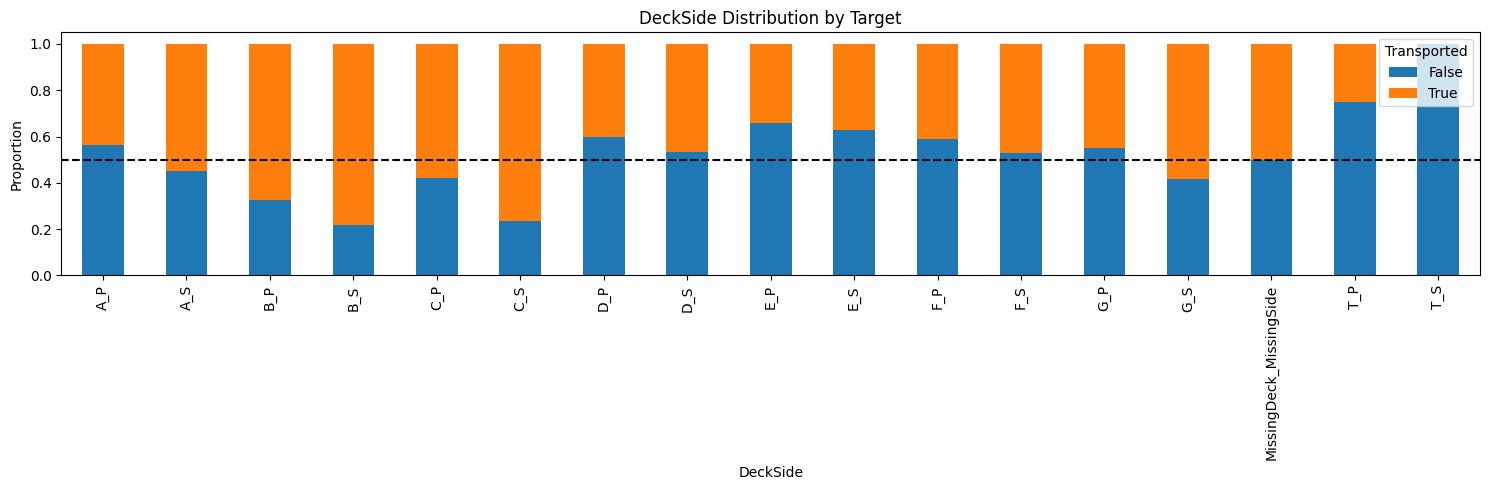

In [ ]:
df["DeckSide"] = df["Deck"] + "_" + df["Side"]

ct = pd.crosstab(
    df["DeckSide"],
    df[target],
    normalize="index"
)

ct.plot(kind="bar", stacked=True, figsize=(15, 5))
plt.axhline(0.5, color="black", linestyle="--")
plt.ylabel("Proportion")
plt.title("DeckSide Distribution by Target")
plt.tight_layout()
plt.show()

Several decks show opposite tendencies depending on cabin side, such as **Deck B** and **Deck C**, where the **S side** has a higher transported rate than the **P side**. The side dependency indicates the interaction between **Deck** and **Side**, justifying their combination into a single feature.

In [ ]:
df.drop(columns=['Deck', 'Side'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,RoomSize,CabinNum,PassengerIdNum,FirstName,LastName,DeckSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1,0,01,Maham,Ofracculy,B_P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,0,01,Juanna,Vines,F_S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,0,01,Altark,Susent,A_S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,0,02,Solam,Susent,A_S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,1,01,Willy,Santantines,F_S
